# Description
This notebook does a statistical analysis of a mana point (MP) spell casting system where a magic user gains 1dx + bonus mana points per level.  The number of MP required to cast a spell is equal to the spell level or the level it is cast at.  The baseline for comparison, which appears as BF Core Rules in the plot legend, is based on the table created by Dimirag on the [Basic Fantasy forums](https://www.basicfantasy.org/forums/viewtopic.php?t=5139).

# Modules

In [1]:
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(legacy='1.25')
import pandas as pd
from pdb import set_trace as st

# Functions

In [24]:
def roll(die=4,level=1,ability_bonus=0):
    """
    randomly generate the number of MP given a die type, level, and ability bonus
    e.g. for a level 3 character, with +2 to their ability score, rolling a d4 to detemine MP this would simulate 3d4+2
    """
    n_rolls = 10000
    roll = np.random.randint(1,die+1,size=n_rolls)
    #roll = int(die/2 + 0.5)
    result = level * ( roll + ability_bonus ) #+ level
    return result
    
def stats(rolls):
    
    mean = np.mean(rolls)
    std = np.std(rolls)
    min = np.min(rolls)
    max = np.max(rolls)

    return {'mean':mean, 'std':std, 'min':min, 'max':max }

def calc_mp_baseline(spell_progression):
    mp = list()
    for char_level, spells_per_level in enumerate(spell_progression):
        level_mp = 0
        for spell_level,n_spells in enumerate(spells_per_level):
            level_mp += (spell_level+1) * n_spells
        mp.append(level_mp)

    return np.array(mp)

# Simulation

In [21]:
# dice used to determine MP earned at each level
dice = [4]
# characters ability bonus added to die roll.  
ability_bonuses = [0]
# starting spell level
start_spell_level = 1
# number of simulated dice+ability_bonus rolls
# dictionary to hold results
results = {}
# spell points "ground truth"
system_spell_progression = {
    # 'OSE':np.array([
    #     (1,0,0,0,0,0), # 1
    #     (2,0,0,0,0,0),
    #     (2,1,0,0,0,0),
    #     (2,2,0,0,0,0),
    #     (2,2,1,0,0,0), # 5
    #     (2,2,2,0,0,0),
    #     (3,2,2,1,0,0),
    #     (3,2,2,2,0,0),
    #     (3,3,3,2,1,0),
    #     (3,3,3,3,2,0), # 10
    #     (4,3,3,3,2,1),
    #     (4,4,3,3,3,2),
    #     (4,4,4,3,3,3),
    #     (4,4,4,4,3,3),
    #     ]),
    'BF':np.array([
        (1,0,0,0,0,0),
        (2,0,0,0,0,0),
        (2,1,0,0,0,0),    
        (2,2,0,0,0,0),
        (2,2,1,0,0,0), #5
        (3,2,2,0,0,0),
        (3,2,2,1,0,0),
        (3,3,2,2,0,0),
        (3,3,2,2,1,0),
        (4,3,3,2,2,0), # 10
        (4,4,3,2,2,1),
        (4,4,3,3,2,2),
        (4,4,4,3,2,2),
        (4,4,4,3,3,2), 
        (5,4,4,3,3,2), # 15
        (5,5,4,3,3,2),
        (5,5,4,4,3,3),
        (6,5,4,4,3,3),
        (6,5,5,4,3,3),
        (6,5,5,4,4,3), # 20
    ])
}
max_level = 20
# simulate rolls and generate statistics
for die in dice:
    # for system,spell_progression in system_spell_progression.items():
    #     max_level = spell_progression.shape[0]
    for ab in ability_bonuses:
        for level in range(start_spell_level,max_level+1):
            rolls = roll(die,level,ab)
            d = stats(rolls)
            if level==1:
                df = pd.DataFrame(d,index=[level])
            else:
                df = pd.concat([df,pd.DataFrame(d,index=[level])])
        results[(die,ab)] = df

# Figures

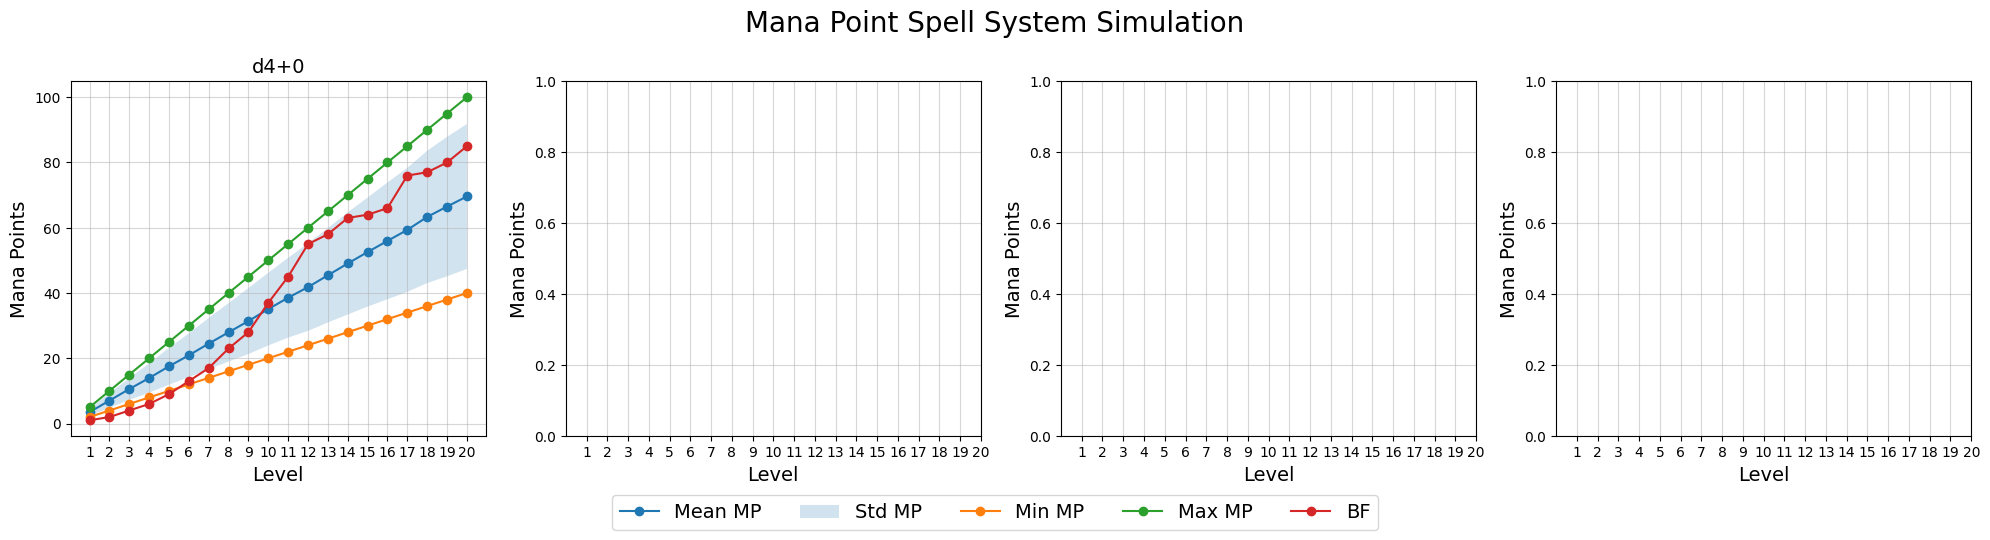

In [22]:
for die in dice:
    fig,axs = plt.subplots(1,4,figsize=(20,5))
    fig.suptitle('Mana Point Spell System Simulation',fontsize=20)
    for idx,ab in enumerate(ability_bonuses):
        x = range(start_spell_level,max_level+1)
        mean = results[(die,ab)]['mean'].values
        std = results[(die,ab)]['std'].values
        min = results[(die,ab)]['min'].values
        max = results[(die,ab)]['max'].values
        axs[idx].plot(x,mean,'-o',label='Mean MP',)
        axs[idx].fill_between(x,mean-std,mean+std,alpha=0.2,label='Std MP')
        axs[idx].plot(x,min,'-o',label='Min MP')
        axs[idx].plot(x,max,'-o',label='Max MP')
        for system,spell_progression in system_spell_progression.items():
            x = range(start_spell_level,spell_progression.shape[0]+1)
            axs[idx].plot(x,calc_mp_baseline(spell_progression),'-o',label=f'{system}')
        axs[idx].set_title(f'd{die}+{ab}',fontsize=14)
        axs[idx].tick_params(axis='both', which='major', labelsize=10)
        
    for ax in axs.flatten():
        ax.set_xlabel('Level',fontsize=14)
        ax.set_ylabel('Mana Points',fontsize=14)
        ax.grid(alpha=0.5)
        #ax.set_ylim(top=max_level*(die+ab))
        # ax.set_ylim(top=100)
        ax.set_xticks(x)

    handles, labels = axs[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='lower center',ncol=6,bbox_to_anchor=(0.5,-0.08),fontsize=14)
    plt.tight_layout()
    plt.show()
    plt.close()

In [23]:
mean

array([ 3.4945,  7.0318, 10.5633, 13.95  , 17.533 , 20.9154, 24.4944,
       27.96  , 31.4028, 35.073 , 38.5594, 41.8116, 45.4285, 49.0546,
       52.548 , 55.9728, 59.3538, 63.3114, 66.4962, 69.588 ])